In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
%matplotlib inline
from matplotlib import font_manager
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,r2_score,mean_absolute_error,mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import xgboost
import joblib


pd.set_option("display.max_columns", None)


In [2]:
font_list = font_manager.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list

['/home/ubuntu/anaconda3/envs/python3/fonts/SourceCodePro-Light.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/Ubuntu-C.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/SourceCodePro-BlackIt.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-BoldOblique.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/SourceCodePro-Semibold.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/Ubuntu-BI.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/home/ubuntu/anaconda3/envs/python3/fonts/Ubuntu-RI.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/shar

In [3]:
font_path = '/usr/share/fonts/truetype/NanumGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [4]:
df = pd.read_csv('usedcar_total_0608.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90802 entries, 0 to 90801
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_url        90802 non-null  int64  
 1   car_area       90802 non-null  object 
 2   car_no         90802 non-null  object 
 3   car_brand      90802 non-null  object 
 4   nation         90802 non-null  object 
 5   car_model      90802 non-null  object 
 6   car_name       90802 non-null  object 
 7   name_detailed  90802 non-null  object 
 8   new_price      90802 non-null  int64  
 9   price          90802 non-null  int64  
 10  year           90802 non-null  int64  
 11  use            90802 non-null  int64  
 12  depreciation   90802 non-null  int64  
 13  mileage        90802 non-null  int64  
 14  fuel           90802 non-null  object 
 15  forecast_min   90802 non-null  int64  
 16  forecast_max   90802 non-null  int64  
 17  car_type       90802 non-null  object 
 18  car_cc

In [58]:
len(df['color'].unique())

336

# Numerical <> Categorical 분류
- n_feature = ['price', 'depreciation', 'mileage','year','use','change']
- c_feature = ['car_area','car_brand','car_model','fuel','car_type','insurance','sales_corp','sales_loca']

In [5]:
n_feature = ['price', 'depreciation', 'mileage','year','use','change']
c_feature = ['car_area','car_brand','car_model','fuel','car_type','insurance','sales_corp','sales_loca']

# 국산과 수입 분류

In [6]:
domestic_df = df[df.nation == '국산']
imported_df = df[df.nation != '국산']

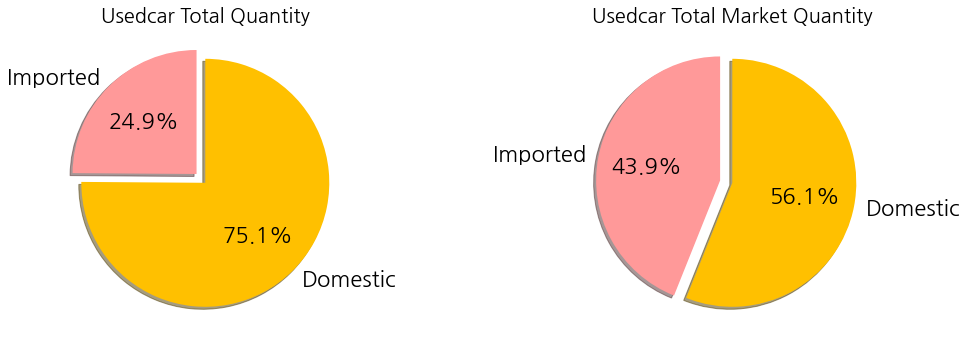

In [7]:
fig = plt.figure(figsize=(15,10))

title = ['Usedcar Total Quantity',
         'Usedcar Total Market Quantity']

data = [[len(domestic_df), len(imported_df)],
        [sum(domestic_df['price']), sum(imported_df['price'])]]

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.7, hspace=0.5)

for i in range(0,2):
    plt.subplot(1,2,i+1)
    plt.title(title[i], fontsize = 20)
    plt.pie(data[i],
            labels = ['Domestic','Imported'],
            autopct='%.1f%%',
           startangle = 90,
           counterclock=False,
           textprops = {'fontsize':22},explode=[0,0.1], shadow=True, colors=['#ffc000','#ff9999'])

#plt.text(0,0,'s')

plt.show()

# Numerical Data 분포 확인

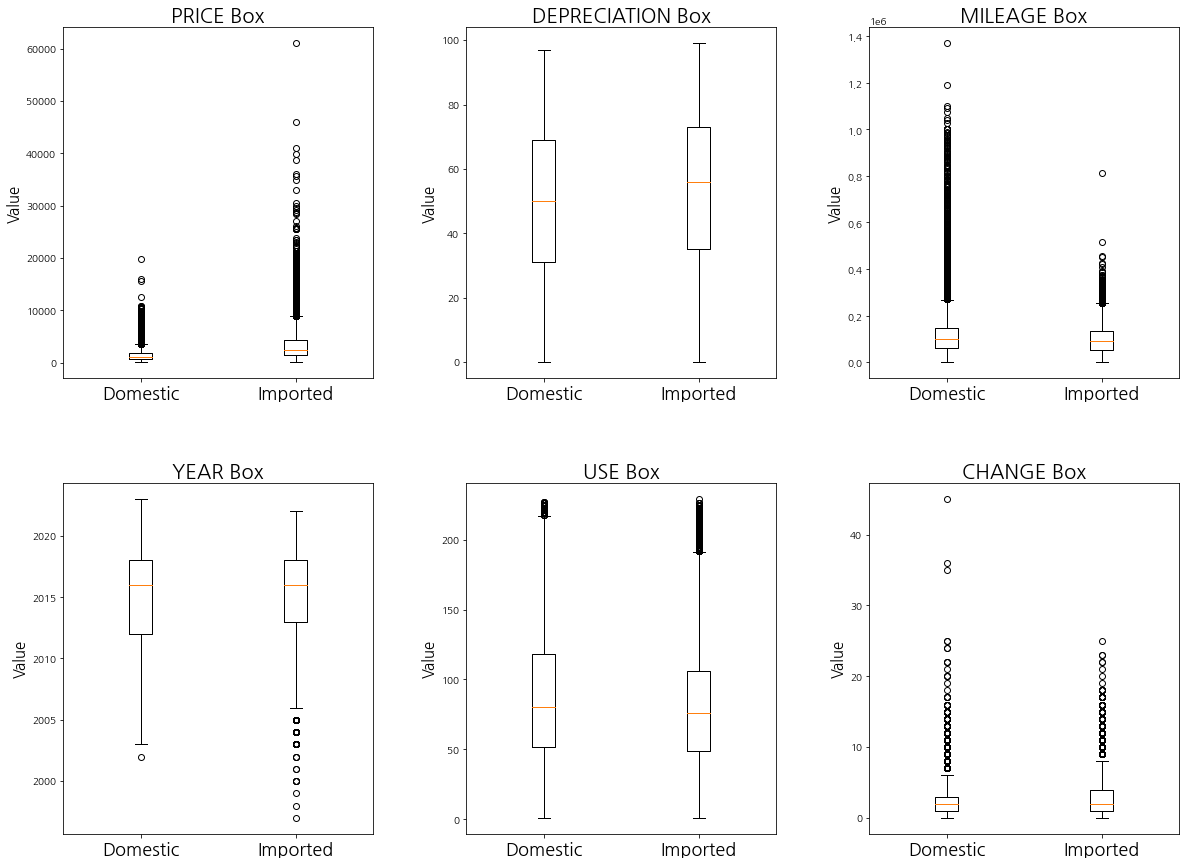

In [8]:
feature = ['price', 'depreciation', 'mileage','year','use','change']

plt.figure(figsize=(20,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)


for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(f'{feature[i].upper()} Box', fontsize = 20)
    plt.boxplot([domestic_df[feature[i]],imported_df[feature[i]]])
    plt.xticks([1, 2],['Domestic', 'Imported'], fontsize = 18)
    plt.ylabel('Value', fontsize = 15)
    
plt.show()

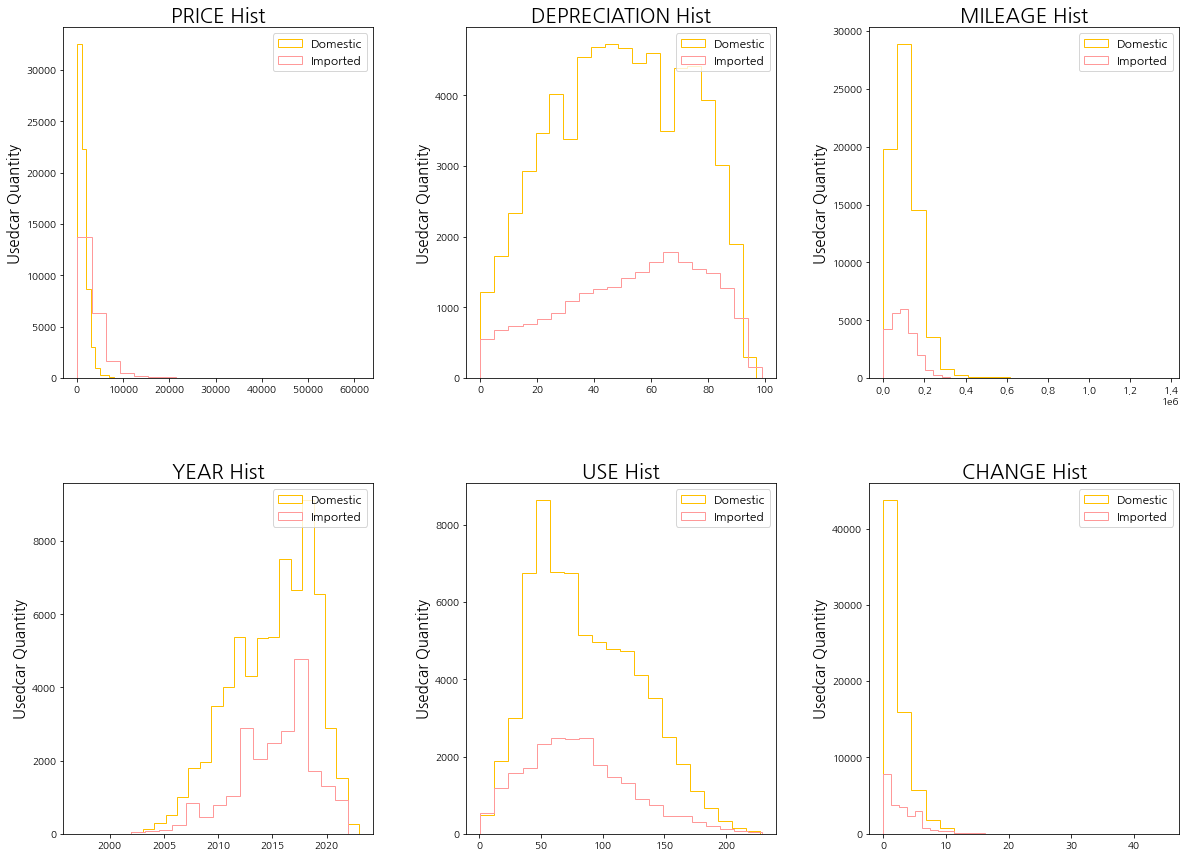

In [9]:
feature = ['price', 'depreciation', 'mileage','year','use','change']

plt.figure(figsize=(20,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(f'{feature[i].upper()} Hist', fontsize = 20)
    plt.hist(domestic_df[feature[i]],bins = 20, histtype='step',
            label = "Domestic", color = '#ffc000')
    plt.hist(imported_df[feature[i]],bins = 20, histtype='step',
            label = "Imported", color = '#ff9999')
    
    plt.ylabel('Usedcar Quantity', fontsize = 15)
    
    plt.legend(fontsize=12)
plt.show()

# 감가상각률과 상관관계

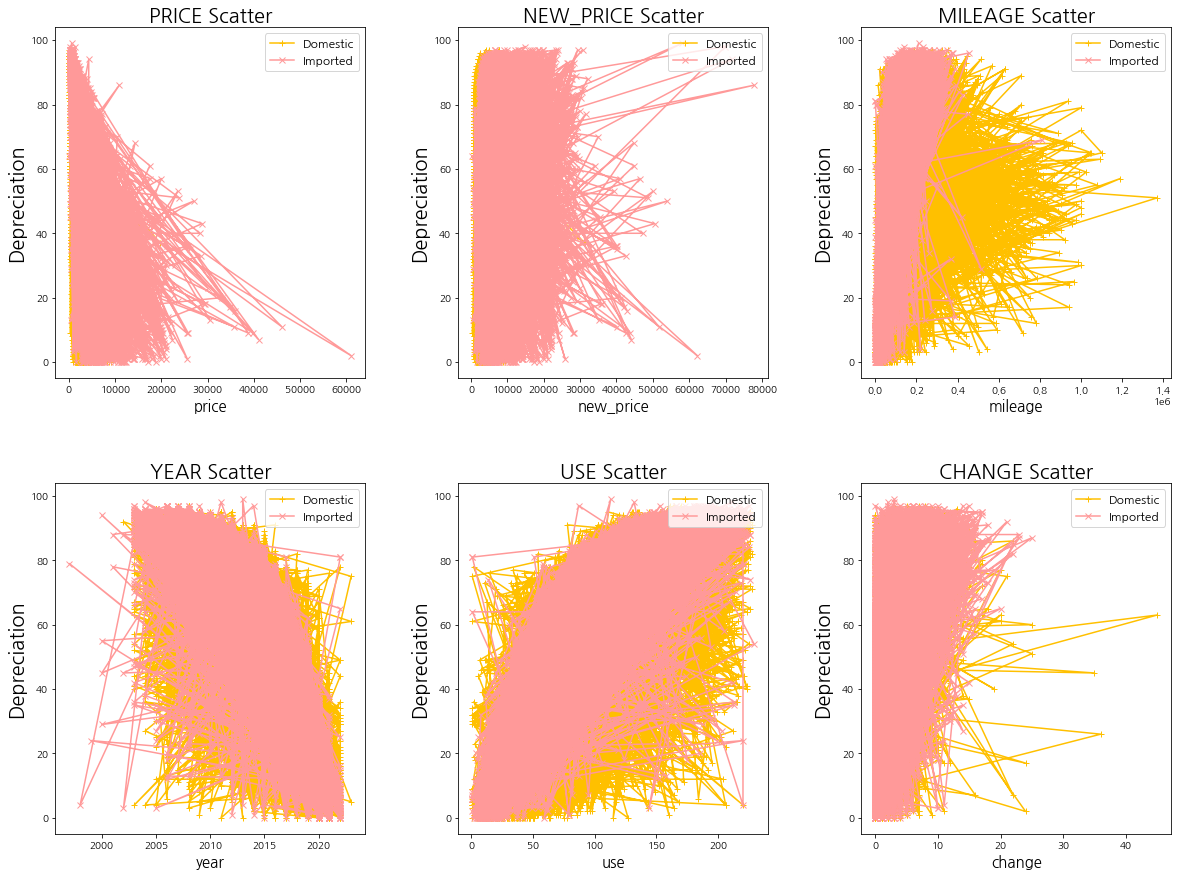

In [10]:
feature = ['price', 'new_price', 'mileage','year','use','change']

plt.figure(figsize=(20,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(f'{feature[i].upper()} Scatter', fontsize = 20)
    plt.xlabel(f'{feature[i]}', fontsize = 15)
    plt.ylabel('Depreciation', fontsize = 20)
    plt.plot(domestic_df[feature[i]],domestic_df['depreciation'],marker ='+', color = '#ffc000',label = "Domestic")
    plt.plot(imported_df[feature[i]],imported_df['depreciation'],marker ='x', color = '#ff9999',label = "Imported")
    plt.legend(fontsize=12,loc='upper right')
    
plt.show()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


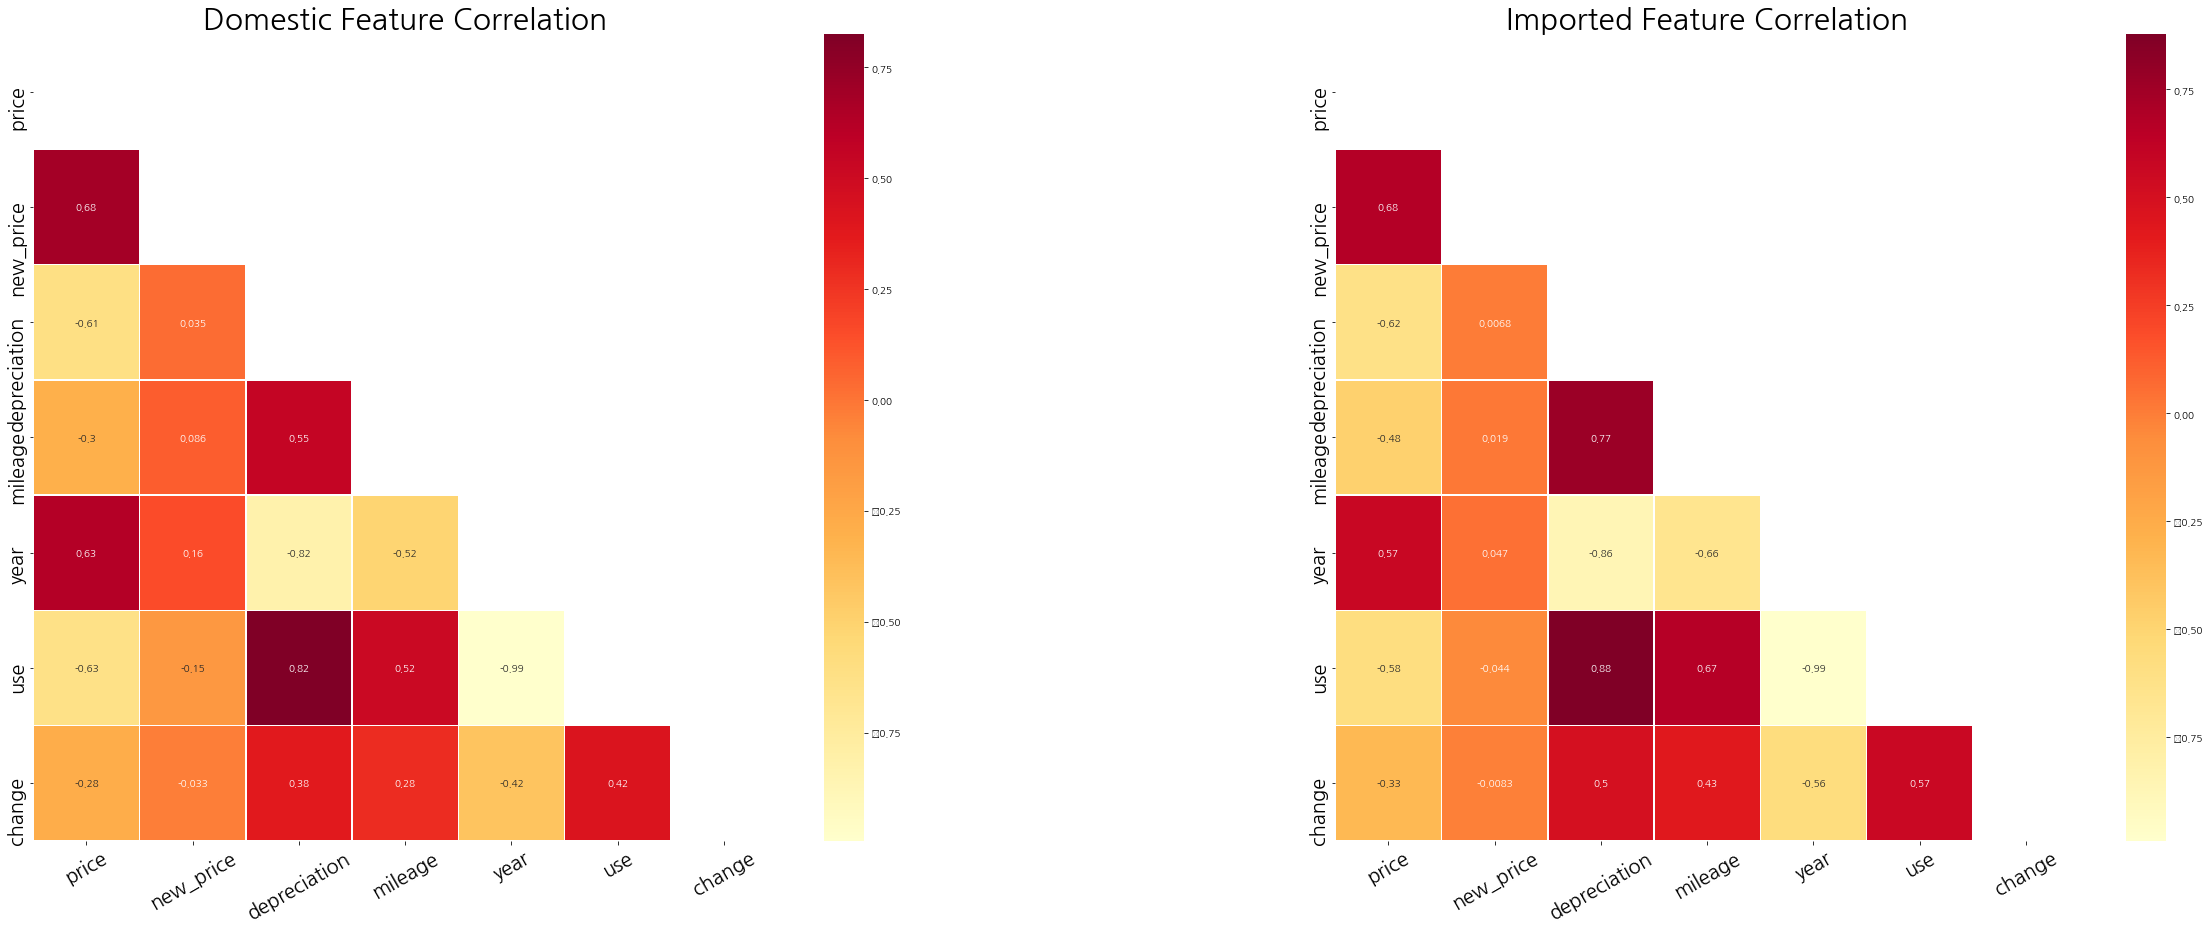

In [11]:
feature = ['price','new_price', 'depreciation', 'mileage','year','use','change']

plt.figure(figsize=(40,14))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.7)

df_list = [domestic_df, imported_df]
title_list = ['Domestic Feature Correlation', 'Imported Feature Correlation']

for i in range(0,2):
    plt.subplot(1,2,i+1)
    heat_table = df_list[i][feature].corr()
    mask = np.zeros_like(heat_table)
    mask[np.triu_indices_from(mask)] = True
    
    heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='YlOrRd',linewidths=0.5)
    heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=20 , rotation =30)
    heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=20)
    
    plt.title(title_list[i], fontsize=30)
plt.show()

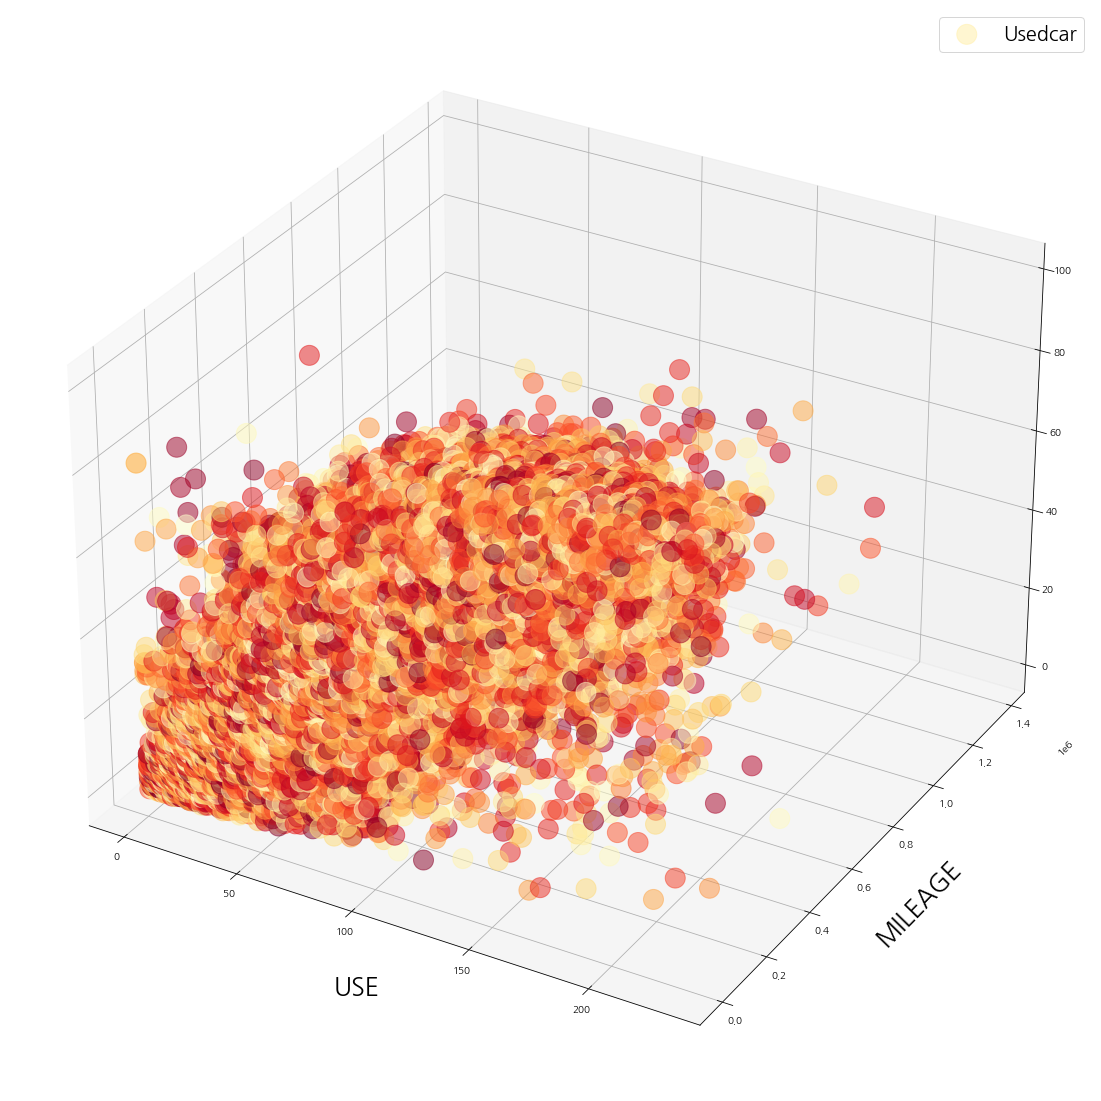

In [12]:
fig = plt.figure(figsize=(30, 20))
colors = np.random.rand(90802)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['use'], df['mileage'], df['depreciation'],c=colors, marker='o', s=20**2, alpha=0.5, cmap='YlOrRd', label="Usedcar")
plt.xlabel('use'.upper(), fontsize = 25,labelpad=25)
plt.ylabel('mileage'.upper(), fontsize = 25, labelpad=25)
#plt.text(df['use'].max(), df['mileage'].max(), "DEPRECIATION", fontsize = 20)

plt.legend(loc="best", fontsize = 20)
plt.show()

## Categorical Data 분포 확인 

In [13]:
c_feature = ['car_area','car_brand','car_model','fuel','car_type','insurance','sales_corp','sales_loca']

In [14]:
df_c = df[c_feature]
df_c

,car_area,car_brand,car_model,fuel,car_type,insurance,sales_corp,sales_loca
0,경기,한국GM,올란도,LPG,RV,있음,주식회사 노빌리티 경기지점,경기 수원시
1,광주,한국GM,트랙스,디젤,SUV,없음,주식회사 즐거운모터스,광주 서구
2,경기,한국GM,스파크,가솔린,경차,없음,창대모터스,경기 수원시
3,광주,한국GM,크루즈,가솔린,준중형,있음,(주)파랑새모터스,광주광역시 서구
4,부산,한국GM,알페온,가솔린,대형,있음,청산자동차상사,부산광역시 사상구
...,...,...,...,...,...,...,...,...
90797,경기,기아,카니발,디젤,RV,있음,MK모터스,경기 용인시
90798,경기,기아,K5,LPG,중형,있음,제일자동차,경기도 평택시
90799,광주,기아,봉고,디젤,트럭,없음,스타모터스,광주 서구
90800,경기,기아,모하비,디젤,SUV,없음,MK모터스,경기 용인시


In [15]:
freq_list = []
label_list = []
for col in df_c.columns:
    find_mode = col
    mode_uniq_val = df_c[find_mode].unique()
    val_freq = []

    for uniq_val in mode_uniq_val:
        val_freq.append(len(df_c[df_c[find_mode]== uniq_val]))

    #print(mode_uniq_val)
    #print(val_freq)
    
    frequency = sorted(zip(mode_uniq_val,val_freq),key=lambda x: x[1],reverse=True)
    #print(frequency)
    
    sorted_uniq_val = [x[0] for x in frequency[:10]]
    sorted_val_freq = [x[1] for x in frequency[:10]]
    
    freq_list.append(sorted_val_freq)
    label_list.append(sorted_uniq_val)
    #print(sorted_val_freq)
    #print(sum(sorted_val_freq))
    
print(freq_list)
print(label_list)

[[43885, 8465, 8071, 5177, 4596, 4311, 3539, 2746, 2611, 1835], [24874, 21684, 7570, 5661, 5233, 5090, 4423, 2982, 2365, 1421], [3719, 3314, 3120, 2858, 2725, 2586, 2549, 2517, 2205, 2159], [42481, 39324, 6538, 1919, 332, 116, 49, 17, 15, 11], [22049, 15958, 15629, 10724, 8092, 7460, 4153, 2898, 2116, 1373], [65447, 25355], [1033, 653, 558, 543, 521, 520, 471, 468, 462, 429], [23398, 4957, 4940, 4285, 3380, 3341, 2813, 2176, 2158, 1983]]
[['경기', '인천', '광주', '서울', '경남', '부산', '대전', '대구', '전북', '전남'], ['기아', '현대', '한국GM', '쌍용', '벤츠', 'BMW', '르노삼성', '제네시스', '아우디', '폭스바겐'], ['그랜저', '모닝', '카니발', '포터', '쏘나타', 'K5', '아반떼', '쏘렌토', '스파크', '봉고'], ['가솔린', '디젤', 'LPG', '하이브리드(가솔린)', '전기', '하이브리드(디젤)', '하이브리드(LPG)', '가솔린+LPG', 'CNG', '기타'], ['SUV', '중형', '대형', '준중형', '트럭', '경차', 'RV', '소형', '승합', '스포츠카'], ['있음', '없음'], ['코리아모터스', '카메이트', '무결점카모터스', '로또모터스', '오토그린모터스', '준모터스', '블루오토', '제이원모터스', '드림모터스', '(주)에스에이치모터스'], ['경기 수원시', '경기 부천시', '인천 서구', '광주 서구', '경기 안산시', '광주광역시 서구', '서울 강서구', '대전 유성구', 

In [16]:
font

'NanumGothic'

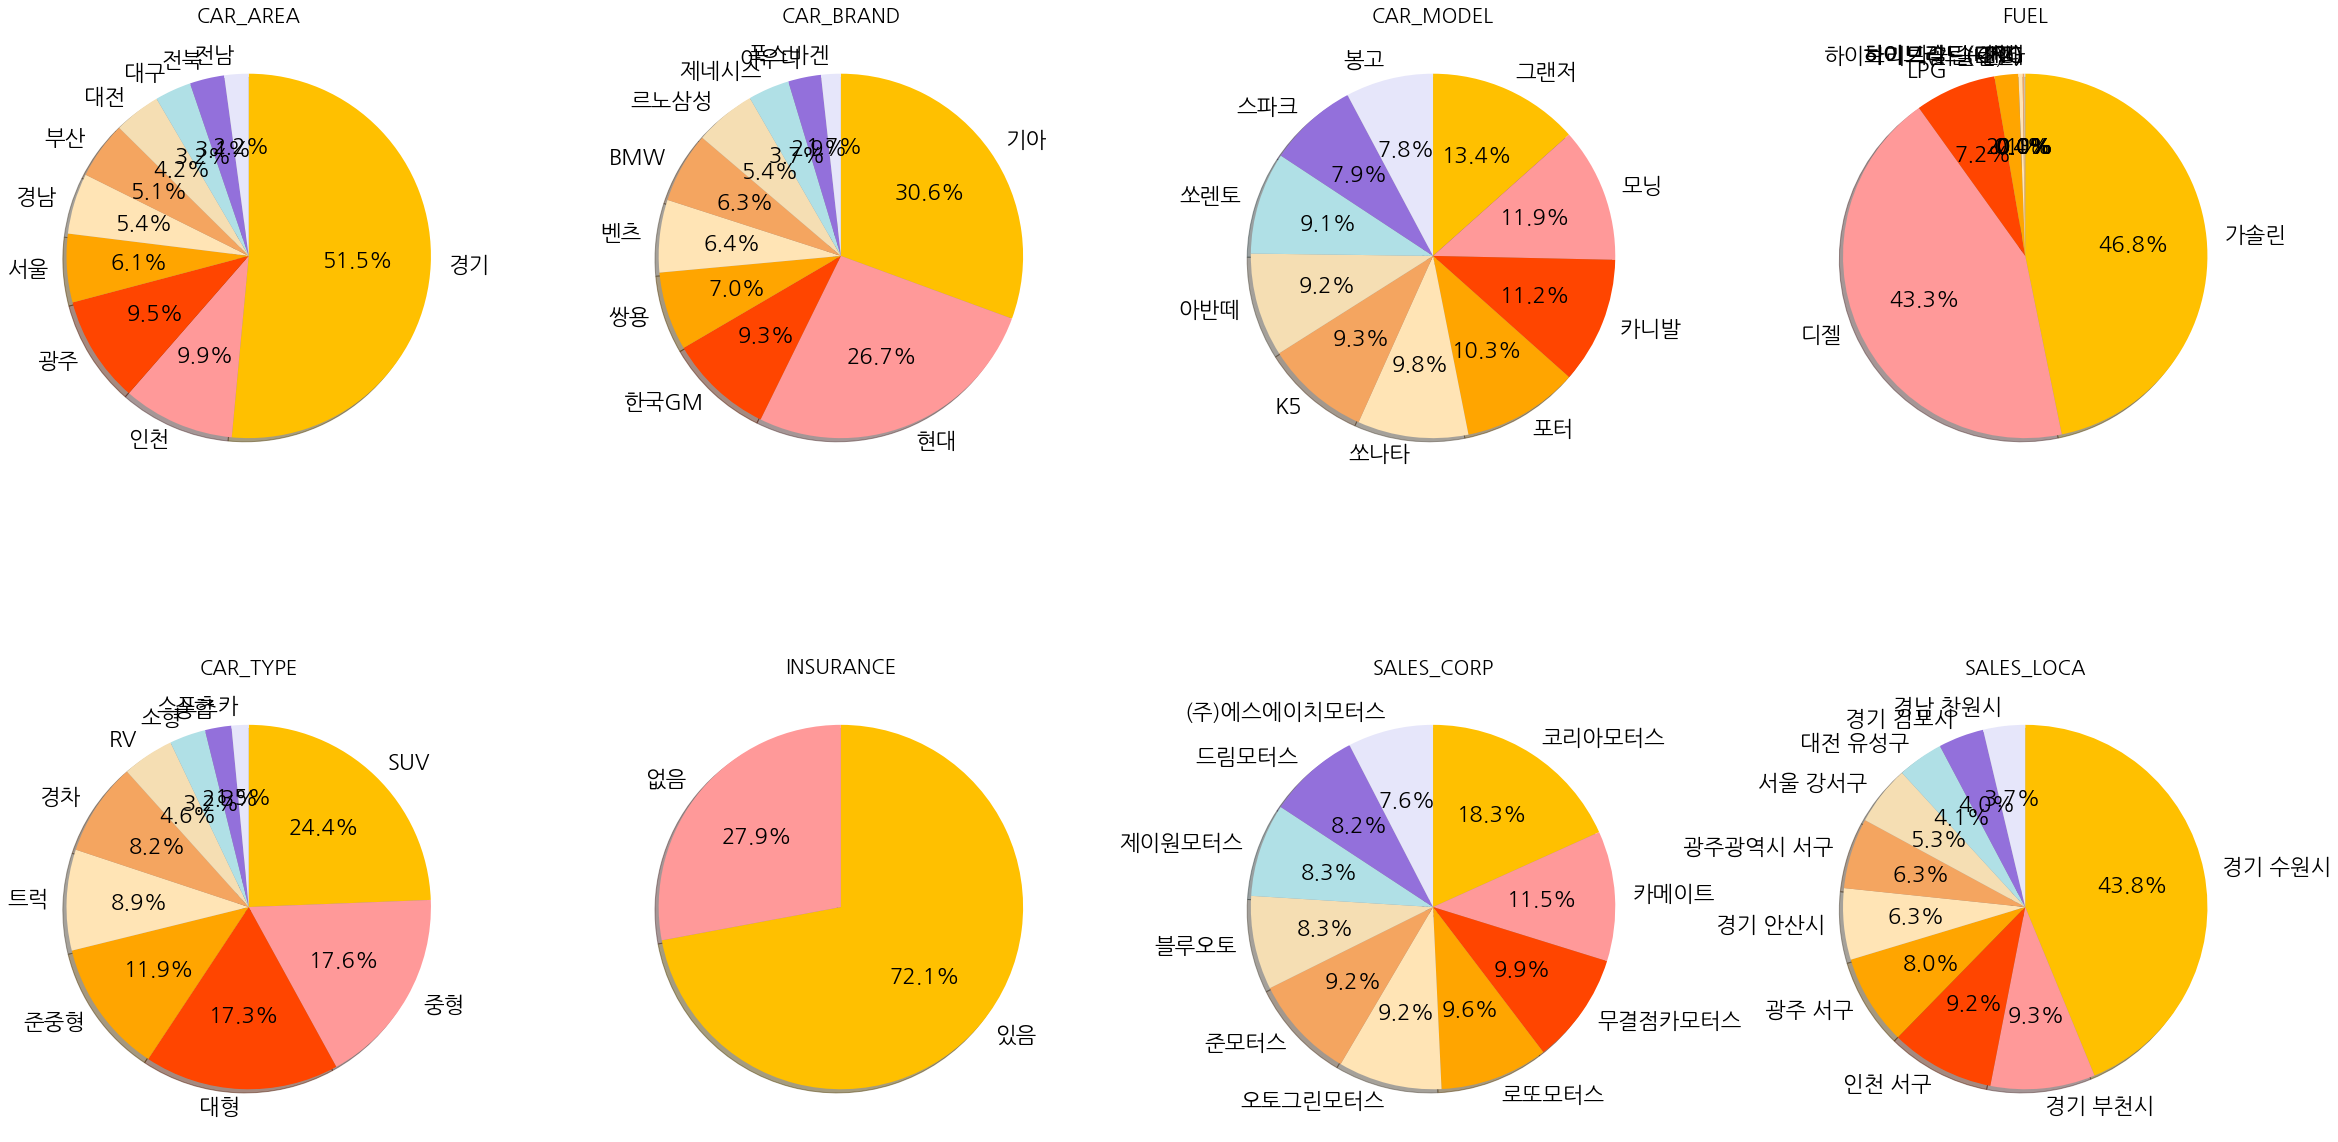

In [17]:
%matplotlib inline
plt.figure(figsize=(40,20))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
colors = ['#ffc000','#ff9999','#ff4500','#ffa500','#ffe4b5', '#f4a560', '#f5deb3','#b0e0e6','#9370db','#e6e6fa']


for i in range(len(label_list)):
    plt.subplot(2,4,i+1)
    plt.title(df_c.columns[i].upper(), fontsize = 20)
    plt.pie(freq_list[i],
            labels = label_list[i],
            autopct='%.1f%%',
           startangle = 90,
           counterclock=False,
           textprops = {'fontsize':22}, shadow=True, colors = colors)

# 모델링

# 1. XGBoost

In [18]:
df = pd.read_csv('usedcar_total_0608.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89890 entries, 0 to 89889
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_url        89890 non-null  int64  
 1   car_area       89890 non-null  object 
 2   car_no         89890 non-null  object 
 3   car_brand      89890 non-null  object 
 4   nation         89890 non-null  object 
 5   car_model      89890 non-null  object 
 6   car_name       89890 non-null  object 
 7   name_detailed  89890 non-null  object 
 8   new_price      89890 non-null  int64  
 9   price          89890 non-null  int64  
 10  year           89890 non-null  int64  
 11  use            89890 non-null  int64  
 12  depreciation   89890 non-null  int64  
 13  mileage        89890 non-null  int64  
 14  fuel           89890 non-null  object 
 15  forecast_min   89890 non-null  int64  
 16  forecast_max   89890 non-null  int64  
 17  car_type       89890 non-null  object 
 18  car_cc

In [19]:
X = df[['use','nation','car_brand','car_model','mileage','year','car_type','fuel','trans','loss','flood','usage','change','insurance']] 
Y = df[['depreciation']]

In [20]:
encoded_X = pd.get_dummies(data = X, columns = ['nation','car_brand','car_model','car_type','fuel','trans','loss','flood','usage','insurance'])

In [21]:
s_scale = StandardScaler()

s_scale.fit(encoded_X)
scaled_X= s_scale.transform(encoded_X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y, random_state = 5, test_size = 0.25)
xgb_reg = xgboost.XGBRegressor(learning_rate = 0.5, n_estimators = 200)
xgb_reg.fit(X_train, np.ravel(y_train))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [75]:
xgb_reg_predict = xgb_reg.predict(X_test)

In [68]:
print(f'train acc : {xgb_reg.score(X_train, y_train)}')
print(f'test acc : {xgb_reg.score(X_test, y_test)}')
print(f'MAE : {mean_absolute_error(y_test, xgb_reg_predict)}')
print(f'MSE : {mean_squared_error(y_test, xgb_reg_predict)}')

train acc : 0.945561359706838
test acc : 0.9228646829991787
MAE : 4.587148960259549
MSE : 41.78106764614798


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


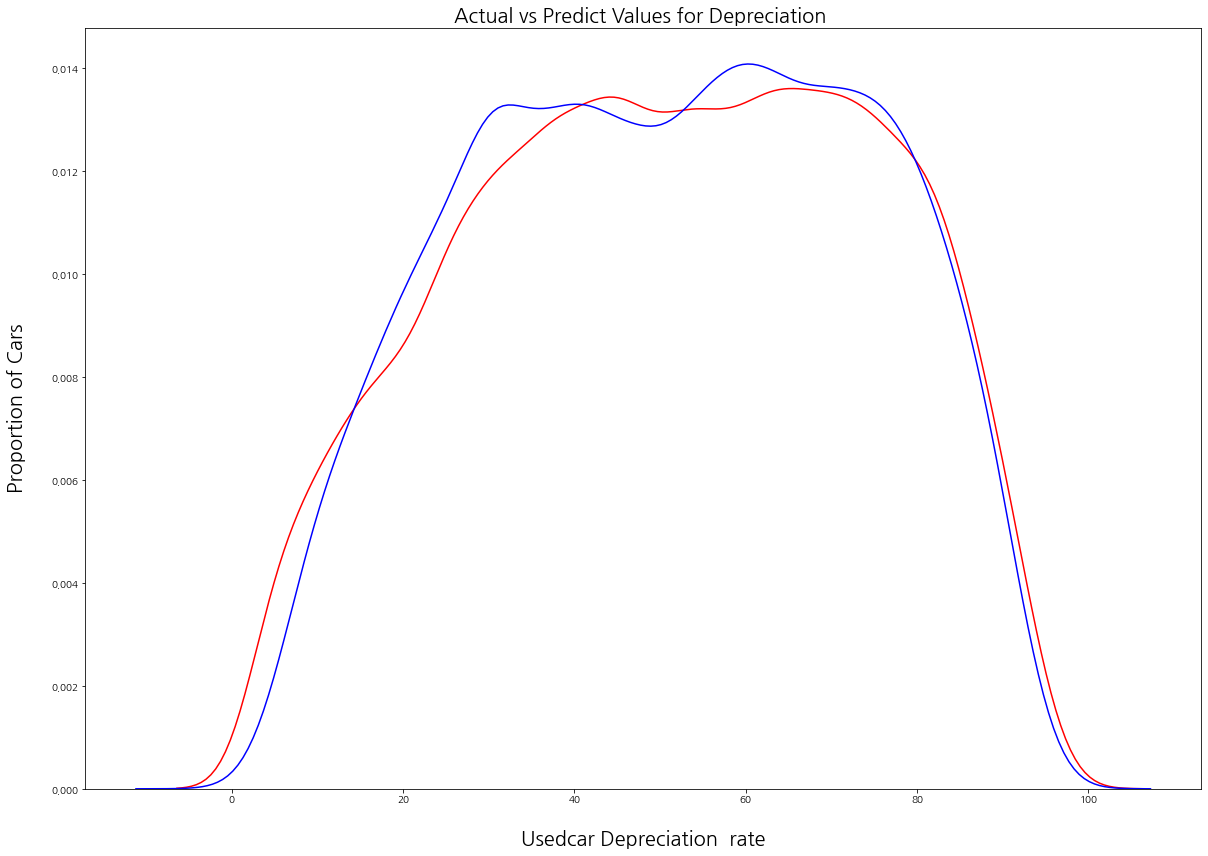

In [69]:
plt.figure(figsize=(20, 14))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(xgb_reg_predict, hist=False, color="b", label="Predict Values" , ax=ax1)

plt.title('Actual vs Predict Values for Depreciation ',fontsize = 20)
plt.xlabel('Usedcar Depreciation  rate',fontsize = 20,labelpad=25)
plt.ylabel('Proportion of Cars',fontsize =20,labelpad=25)

plt.show()
plt.close()

# 2. RandomForest

In [26]:
X = df[['use','nation','car_brand','car_model','mileage','year','car_type','fuel','trans','loss','flood','usage','change','insurance']] 
Y = df[['depreciation']]

In [27]:
encoded_X = pd.get_dummies(data = X, columns = ['nation','car_brand','car_model','car_type','fuel','trans','loss','flood','usage','insurance'])

In [28]:
scaled_X= s_scale.transform(encoded_X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,Y, random_state = 5, test_size = 0.25)
randforest = RandomForestRegressor(n_estimators= 200) #
randforest.fit(X_train, np.ravel(y_train))

RandomForestRegressor(n_estimators=200)

In [77]:
randomforest_predict = randforest.predict(X_test)

In [71]:
# 모델명, acc.append 부분 model 이름 변경해주기

print(f'train acc : {randforest.score(X_train, y_train)}')
print(f'test acc : {randforest.score(X_test, y_test)}')
print(f'MAE : {mean_absolute_error(y_test, randomforest_predict)}')
print(f'MSE : {mean_squared_error(y_test, randomforest_predict)}')


train acc : 0.9881943203835896
test acc : 0.9162642784249458
MAE : 4.794233124193476
MSE : 45.35623866677177


In [79]:
mix_pred = []

for i in range(len(y_test)):
    pred = (xgb_reg_predict[i] + randomforest_predict[i] ) / 2
    mix_pred.append(pred)

In [85]:
mix_pred =np.array(mix_pred)

In [93]:
print(f'test acc : {r2_score(y_test, mix_pred)}')
print(f'MAE : {mean_absolute_error(y_test, mix_pred)}')
print(f'MSE : {mean_squared_error(y_test, mix_pred)}')


test acc : 0.9249077283086351
MAE : 4.514824858122273
MSE : 40.6744329994318


In [78]:
r2_score(y_test,randomforest_predict)

0.9162642784249458

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


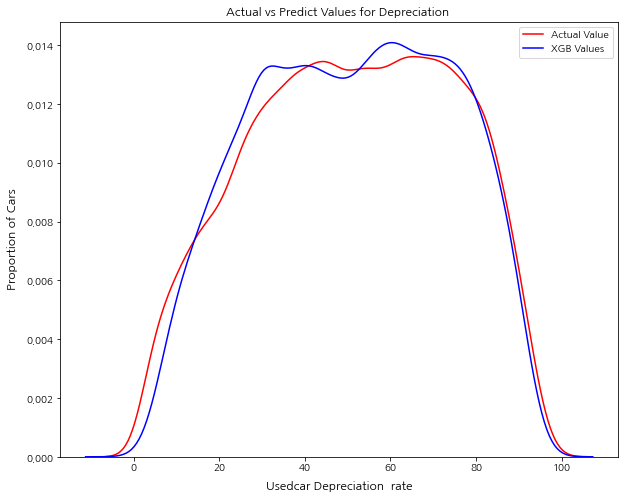

In [113]:
plt.figure(figsize=(10, 8))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
#sns.distplot(randomforest_predict, hist=False, color="b", label="RandomForest Values" , ax=ax1)
sns.distplot(xgb_reg_predict, hist=False, color="b", label="XGB Values" , ax=ax1)
#sns.distplot(mix_pred, hist=False, color="g", label="Mixed Values" , ax=ax1)

plt.title('Actual vs Predict Values for Depreciation ',fontsize = 12)
plt.xlabel('Usedcar Depreciation  rate',fontsize = 12,labelpad=8)
plt.ylabel('Proportion of Cars',fontsize =12,labelpad=8)

plt.legend(fontsize = 10, loc = 'upper right')
plt.show()
plt.close()

In [35]:
joblib.dump(randforest, 'rand_reg_0609.pkl')
joblib.dump(xgb_reg, 'xgb_reg_0609.pkl')
joblib.dump(s_scale, 's_scale_0609.pkl')

['s_scale_0609.pkl']

## search_car 만들어 줄 vector하나 복사해서 .csv파일로 만들기

In [42]:
encoded_X[:1]

,use,mileage,year,change,nation_국산,nation_수입,car_brand_BMW,car_brand_GMC,car_brand_MAN,car_brand_기아,car_brand_닛산,car_brand_다이하쓰,car_brand_닷지,car_brand_도요타,car_brand_동풍자동차,car_brand_람보르기니,car_brand_랜드로버,car_brand_렉서스,car_brand_로버,car_brand_롤스로이스,car_brand_르노삼성,car_brand_르노코리아,car_brand_링컨,car_brand_마세라티,car_brand_마이바흐,car_brand_마쯔다,car_brand_맥라렌,car_brand_미니,car_brand_미쯔비시,car_brand_벤츠,car_brand_벤틀리,car_brand_볼보,car_brand_사브,car_brand_선롱버스,car_brand_쉐보레,car_brand_스마트,car_brand_스바루,car_brand_스즈키,car_brand_시트로엥,car_brand_쌍용,car_brand_아우디,car_brand_애스턴마틴,car_brand_어큐라,car_brand_이베코,car_brand_인피니티,car_brand_재규어,car_brand_제네시스,car_brand_중한자동차,car_brand_지프,car_brand_캐딜락,car_brand_크라이슬러,car_brand_테슬라,car_brand_페라리,car_brand_포드,car_brand_포르쉐,car_brand_포톤,car_brand_폭스바겐,car_brand_푸조,car_brand_피아트,car_brand_한국GM,car_brand_허머,car_brand_현대,car_brand_혼다,car_model_09월 03일,car_model_09월 05일,car_model_1시리즈,car_model_200,car_model_2008,car_model_206,car_model_207,car_model_208,car_model_2시리즈,car_model_3008,car_model_300C,car_model_307,car_model_308,car_model_370Z,car_model_3시리즈,car_model_406,car_model_407,car_model_488 스파이더,car_model_4시리즈,car_model_500,car_model_508,car_model_57,car_model_570S,car_model_5시리즈,car_model_62s,car_model_650S,car_model_675LT,car_model_6시리즈,car_model_720S,car_model_7시리즈,car_model_86,car_model_8시리즈,car_model_911,car_model_A1,car_model_A3,car_model_A4,car_model_A5,car_model_A6,car_model_A7,car_model_A8,car_model_ALL NEW ESCALADE,car_model_AMG GT,car_model_ATS,car_model_ATS-V,car_model_A클래스,car_model_BH,car_model_BLS,car_model_BS,car_model_B클래스,car_model_B클래스 W246,car_model_C3,car_model_C4,car_model_C5,car_model_C70,car_model_CC,car_model_CK 미니 밴,car_model_CK 미니 트럭,car_model_CLA클래스,car_model_CLK클래스,car_model_CL클래스,car_model_CR-V,car_model_CT,car_model_CT4,car_model_CT5,car_model_CT6,car_model_CTS 1세대,car_model_CTS 2세대,car_model_CTS 3세대,car_model_CTS-V,car_model_CX-5,car_model_C클래스,car_model_DB11,car_model_DB9,car_model_DTS,car_model_DUEGO,car_model_E-PACE,car_model_E-Series,car_model_EOS,car_model_EQ900,car_model_EQC,car_model_ES,car_model_ESCALADE,car_model_ESCALADE(1~3세대),car_model_ESCALADE(4세대),car_model_ESCALADE(5세대),car_model_EX30d,car_model_EX35,car_model_E클래스,car_model_E클래스 (C238),car_model_E클래스 (W213),car_model_F-PACE,car_model_F-TYPE,car_model_F150,car_model_F430,car_model_FF,car_model_FJ크루저,car_model_FX35,car_model_G25,car_model_G2X,car_model_G35,car_model_G37,car_model_G70,car_model_G70 SPORT,car_model_G80 SPORT,car_model_G80(DH),car_model_G80(RG3),car_model_G90,car_model_GLA H247,car_model_GLC,car_model_GLE,car_model_GLE (V167),car_model_GLK클래스,car_model_GLS,car_model_GL클래스,car_model_GS,car_model_GV70,car_model_GV80,car_model_G클래스,car_model_H2,car_model_H3,car_model_HR-V,car_model_I-PACE,car_model_IS,car_model_JX35,car_model_K3,car_model_K5,car_model_K7,car_model_K8,car_model_K9,car_model_KENBO 600,car_model_LC,car_model_LS,car_model_LS 5세대,car_model_M30d,car_model_M35,car_model_M37,car_model_M45,car_model_MDX,car_model_MKC,car_model_MKS,car_model_MKX,car_model_MKX 2세대,car_model_MKZ,car_model_Model 3,car_model_Model X,car_model_M시리즈,car_model_M클래스,car_model_NV,car_model_NX,car_model_PT 크루저,car_model_Q2,car_model_Q3,car_model_Q30,car_model_Q45,car_model_Q5,car_model_Q50,car_model_Q60,car_model_Q7,car_model_Q70,car_model_Q8,car_model_QM3,car_model_QM5,car_model_QM6,car_model_QX,car_model_QX30,car_model_QX50,car_model_QX50 2세대,car_model_QX60,car_model_QX70,car_model_QX80,car_model_R8,car_model_RAV4,car_model_RC,car_model_RCZ,car_model_RVR,car_model_RX,car_model_RX시리즈,car_model_R클래스,car_model_S-TYPE,car_model_S3,car_model_S4,car_model_S5,car_model_S6,car_model_S660,car_model_S7,car_model_S8,car_model_S90,car_model_SC,car_model_SCION,car_model_SLC클래스,car_model_SLK클래스,car_model_SL클래스,car_model_SM3,car_model_SM5,car_model_SM6,car_model_SM7,car_model_SQ5,car_model_SQ8,car_model_SRX,car_model_STS,car_model_S클래스,car_model_T-Roc,car_model_TT,car_model_TTS,car_model_Taycan,car_model_UX,car_model_V40,car_model_V50,car_mod

In [37]:
search_vector = encoded_X[:1]

In [38]:
search_vector.to_csv('search_vector_0609.csv',index=False, encoding = 'utf8')

### Load해서 대입해보기

In [114]:
scaler = joblib.load('s_scale_0609.pkl')
xgb_reg = joblib.load('xgb_reg_0609.pkl')
rand_reg = joblib.load('rand_reg_0609.pkl')
df = pd.read_csv('usedcar_total_0608.csv')
searh_car = pd.read_csv('search_vector_0609.csv')

searh_car

,use,mileage,year,change,nation_국산,nation_수입,car_brand_BMW,car_brand_GMC,car_brand_MAN,car_brand_기아,car_brand_닛산,car_brand_다이하쓰,car_brand_닷지,car_brand_도요타,car_brand_동풍자동차,car_brand_람보르기니,car_brand_랜드로버,car_brand_렉서스,car_brand_로버,car_brand_롤스로이스,car_brand_르노삼성,car_brand_르노코리아,car_brand_링컨,car_brand_마세라티,car_brand_마이바흐,car_brand_마쯔다,car_brand_맥라렌,car_brand_미니,car_brand_미쯔비시,car_brand_벤츠,car_brand_벤틀리,car_brand_볼보,car_brand_사브,car_brand_선롱버스,car_brand_쉐보레,car_brand_스마트,car_brand_스바루,car_brand_스즈키,car_brand_시트로엥,car_brand_쌍용,car_brand_아우디,car_brand_애스턴마틴,car_brand_어큐라,car_brand_이베코,car_brand_인피니티,car_brand_재규어,car_brand_제네시스,car_brand_중한자동차,car_brand_지프,car_brand_캐딜락,car_brand_크라이슬러,car_brand_테슬라,car_brand_페라리,car_brand_포드,car_brand_포르쉐,car_brand_포톤,car_brand_폭스바겐,car_brand_푸조,car_brand_피아트,car_brand_한국GM,car_brand_허머,car_brand_현대,car_brand_혼다,car_model_09월 03일,car_model_09월 05일,car_model_1시리즈,car_model_200,car_model_2008,car_model_206,car_model_207,car_model_208,car_model_2시리즈,car_model_3008,car_model_300C,car_model_307,car_model_308,car_model_370Z,car_model_3시리즈,car_model_406,car_model_407,car_model_488 스파이더,car_model_4시리즈,car_model_500,car_model_508,car_model_57,car_model_570S,car_model_5시리즈,car_model_62s,car_model_650S,car_model_675LT,car_model_6시리즈,car_model_720S,car_model_7시리즈,car_model_86,car_model_8시리즈,car_model_911,car_model_A1,car_model_A3,car_model_A4,car_model_A5,car_model_A6,car_model_A7,car_model_A8,car_model_ALL NEW ESCALADE,car_model_AMG GT,car_model_ATS,car_model_ATS-V,car_model_A클래스,car_model_BH,car_model_BLS,car_model_BS,car_model_B클래스,car_model_B클래스 W246,car_model_C3,car_model_C4,car_model_C5,car_model_C70,car_model_CC,car_model_CK 미니 밴,car_model_CK 미니 트럭,car_model_CLA클래스,car_model_CLK클래스,car_model_CL클래스,car_model_CR-V,car_model_CT,car_model_CT4,car_model_CT5,car_model_CT6,car_model_CTS 1세대,car_model_CTS 2세대,car_model_CTS 3세대,car_model_CTS-V,car_model_CX-5,car_model_C클래스,car_model_DB11,car_model_DB9,car_model_DTS,car_model_DUEGO,car_model_E-PACE,car_model_E-Series,car_model_EOS,car_model_EQ900,car_model_EQC,car_model_ES,car_model_ESCALADE,car_model_ESCALADE(1~3세대),car_model_ESCALADE(4세대),car_model_ESCALADE(5세대),car_model_EX30d,car_model_EX35,car_model_E클래스,car_model_E클래스 (C238),car_model_E클래스 (W213),car_model_F-PACE,car_model_F-TYPE,car_model_F150,car_model_F430,car_model_FF,car_model_FJ크루저,car_model_FX35,car_model_G25,car_model_G2X,car_model_G35,car_model_G37,car_model_G70,car_model_G70 SPORT,car_model_G80 SPORT,car_model_G80(DH),car_model_G80(RG3),car_model_G90,car_model_GLA H247,car_model_GLC,car_model_GLE,car_model_GLE (V167),car_model_GLK클래스,car_model_GLS,car_model_GL클래스,car_model_GS,car_model_GV70,car_model_GV80,car_model_G클래스,car_model_H2,car_model_H3,car_model_HR-V,car_model_I-PACE,car_model_IS,car_model_JX35,car_model_K3,car_model_K5,car_model_K7,car_model_K8,car_model_K9,car_model_KENBO 600,car_model_LC,car_model_LS,car_model_LS 5세대,car_model_M30d,car_model_M35,car_model_M37,car_model_M45,car_model_MDX,car_model_MKC,car_model_MKS,car_model_MKX,car_model_MKX 2세대,car_model_MKZ,car_model_Model 3,car_model_Model X,car_model_M시리즈,car_model_M클래스,car_model_NV,car_model_NX,car_model_PT 크루저,car_model_Q2,car_model_Q3,car_model_Q30,car_model_Q45,car_model_Q5,car_model_Q50,car_model_Q60,car_model_Q7,car_model_Q70,car_model_Q8,car_model_QM3,car_model_QM5,car_model_QM6,car_model_QX,car_model_QX30,car_model_QX50,car_model_QX50 2세대,car_model_QX60,car_model_QX70,car_model_QX80,car_model_R8,car_model_RAV4,car_model_RC,car_model_RCZ,car_model_RVR,car_model_RX,car_model_RX시리즈,car_model_R클래스,car_model_S-TYPE,car_model_S3,car_model_S4,car_model_S5,car_model_S6,car_model_S660,car_model_S7,car_model_S8,car_model_S90,car_model_SC,car_model_SCION,car_model_SLC클래스,car_model_SLK클래스,car_model_SL클래스,car_model_SM3,car_model_SM5,car_model_SM6,car_model_SM7,car_model_SQ5,car_model_SQ8,car_model_SRX,car_model_STS,car_model_S클래스,car_model_T-Roc,car_model_TT,car_model_TTS,car_model_Taycan,car_model_UX,car_model_V40,car_model_V50,car_mod

In [115]:
searh_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 624 entries, use to insurance_있음
dtypes: int64(624)
memory usage: 5.0 KB


In [116]:
new_car = int(input('신차가격을 숫자만 입력해주세요(단위 : 만원)(ex 7000) :')) # 최종감가상각률에 잔존가치 금액으로 반환하기 위함
use = int(input('사용개월 수를 숫자만 작성해주세요(ex 1년 >> 12) : ')) 
mileage = int(input('주행거리를 숫자만 입력해주세요(단위 : km)(ex 50000) : '))
year = int(input('차량의 연식을 4자리 형태의 숫자만 입력해주세요(ex 2018) : '))
change = int(input('소유주 변경횟수를 숫자만 입력해주세요(ex 3) : '))


nation  = (input(f'{df.nation.unique()} 에서 선택해주세요 : '))
car_brand = input(f"{df[df['nation'] == nation]['car_brand'].unique()} 에서 선택해주세요 : ")
car_model = input(f"{df[df['car_brand'] == car_brand]['car_model'].unique()} 에서 선택해주세요 : ")
car_type = input(f"{df[df['car_model'] == car_model]['car_type'].unique()} 에서 선택해주세요 : ")
fuel = input(f'{df.fuel.unique()} 에서 선택해주세요 : ')
trans = input(f'{df.trans.unique()} 에서 선택해주세요 : ')
loss = input(f'전손이력을 {df.loss.unique()} 에서 선택해주세요 : ')
flood = input(f'침수이력을 {df.flood.unique()} 에서 선택해주세요 : ')
usage = input(f'용도이력을 {df.usage.unique()} 에서 선택해주세요 : ')
insurance = input(f'보험사고정보를 {df.insurance.unique()} 에서 선택해주세요 : ')

신차가격을 숫자만 입력해주세요(단위 : 만원)(ex 7000) :3536
사용개월 수를 숫자만 작성해주세요(ex 1년 >> 12) : 142
주행거리를 숫자만 입력해주세요(단위 : km)(ex 50000) : 180561
차량의 연식을 4자리 형태의 숫자만 입력해주세요(ex 2018) : 2011
소유주 변경횟수를 숫자만 입력해주세요(ex 3) : 4
['국산' '수입'] 에서 선택해주세요 : 국산
['한국GM' '르노삼성' '르노코리아' '쌍용' '제네시스' '현대' '기아'] 에서 선택해주세요 : 기아
['카니발' '스포티지' '오피러스' 'K5' '모닝' 'K3' '레이' 'K7' '스팅어' '쏘렌토' '봉고' '쏘울' '카렌스'
 '프라이드' '모하비' '포르테' '마스터' '스토닉' '셀토스' 'K9' '니로' 'K8' '옵티마' '로체' '쎄라토'
 '라이노' '비스토' '프런티어' '스펙트라' '뉴그랜버드'] 에서 선택해주세요 : K7
['대형' '중형'] 에서 선택해주세요 : 대형
['LPG' '디젤' '가솔린' '하이브리드(가솔린)' 'CNG' '전기' '가솔린+LPG' '기타' '하이브리드(디젤)'
 '하이브리드(LPG)'] 에서 선택해주세요 : 가솔린
['오토' '수동' '기타' 'SAT' 'CVT'] 에서 선택해주세요 : 오토
전손이력을 ['없음' '있음'] 에서 선택해주세요 : 없음
침수이력을 ['없음' '있음'] 에서 선택해주세요 : 없음
용도이력을 ['없음' '있음'] 에서 선택해주세요 : 없음
보험사고정보를 ['있음' '없음'] 에서 선택해주세요 : 없음


In [117]:
for i,column in enumerate(searh_car.columns):
    if i <= 3 :
        searh_car[column] = 0
    else :
        searh_car[column] = np.uint8(0)

searh_car['use'] = use
searh_car['mileage'] = mileage
searh_car['year'] = year
searh_car['change'] = change

searh_car[f'nation_{nation}'] = np.uint8(1)
searh_car[f'car_brand_{car_brand}'] = np.uint8(1)
searh_car[f'car_model_{car_model}'] = np.uint8(1)
searh_car[f'car_type_{car_type}'] = np.uint8(1)
searh_car[f'fuel_{fuel}'] = np.uint8(1)
searh_car[f'trans_{trans}'] = np.uint8(1)
searh_car[f'loss_{loss}'] = np.uint8(1)
searh_car[f'flood_{flood}'] = np.uint8(1)
searh_car[f'usage_{usage}'] = np.uint8(1)
searh_car[f'insurance_{insurance}'] = np.uint8(1)

In [118]:
searh_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 624 entries, use to insurance_있음
dtypes: int64(4), uint8(620)
memory usage: 780.0 bytes


In [119]:
# change(사용자변경회수)
selected = 0
for col in searh_car.columns:
    if searh_car[col][0] != 0:
        selected += 1
        print(f'{col} : {searh_car[col][0]}')
print(selected)

use : 142
mileage : 180561
year : 2011
change : 4
nation_국산 : 1
car_brand_기아 : 1
car_model_K7 : 1
car_type_대형 : 1
fuel_가솔린 : 1
trans_오토 : 1
loss_없음 : 1
flood_없음 : 1
usage_없음 : 1
insurance_없음 : 1
14


In [120]:
scaled_searh_car= scaler.transform(searh_car)
scaled_searh_car

array([[ 1.32022273e+00,  1.05106706e+00, -1.08352043e+00,
         6.82992737e-01,  5.74532761e-01, -5.74532761e-01,
        -2.43206265e-01, -7.45832649e-03, -3.33539079e-03,
         1.63040758e+00, -5.72834749e-02, -8.17023277e-03,
        -1.52863815e-02, -5.09783599e-02, -1.15548397e-02,
        -6.67089290e-03, -1.08505509e-01, -7.42612042e-02,
        -6.67089290e-03, -1.20267253e-02, -2.27109474e-01,
        -1.06653718e-01, -5.44789410e-02, -5.50917830e-02,
        -4.71698113e-03, -4.71698113e-03, -7.45832649e-03,
        -1.12932635e-01, -1.24807921e-02, -2.46320925e-01,
        -2.77163223e-02, -7.02952237e-02, -1.10628552e-02,
        -6.67089290e-03, -2.75145932e-02, -1.10628552e-02,
        -1.15548397e-02, -8.82490909e-03, -2.88972287e-02,
        -2.58612265e-01, -1.62982907e-01, -1.15548397e-02,
        -4.71698113e-03, -3.33539079e-03, -6.01451920e-02,
        -7.94603747e-02, -1.83784841e-01, -1.52863815e-02,
        -8.44140454e-02, -4.55355480e-02, -4.57802185e-0

In [121]:
xgb_reg_predict = xgb_reg.predict(scaled_searh_car)
xgb_reg_predict = xgb_reg_predict[0].astype('float64')

#if xgb_reg_predict >= 15 :
#    xgb_reg_predict += 4.58
#else :
#    pass

rand_reg_predict = rand_reg.predict(scaled_searh_car)
rand_reg_predict = rand_reg_predict[0].astype('float64')

#if rand_reg_predict >= 15 :
#    rand_reg_predict += 4.78
#else :
#    pass

In [123]:
xgb_reg_dep = round(xgb_reg_predict.astype('float64'),1)
print(f'Model Depreciation Predict : {xgb_reg_dep}% 감가')
xgb_price = [math.trunc(new_car * (100 - (int(math.ceil(xgb_reg_predict))))/100), math.ceil(new_car * (100 - (int(math.trunc(xgb_reg_predict))))/100)]
print(f'XGBoost Usedcar Price Predict : {xgb_price[0]} ~ {xgb_price[1]} 만원입니다.')

rand_reg_dep = round(rand_reg_predict.astype('float64'),1)
print(f'Model Depreciation Predict : {rand_reg_dep}% 감가')
rand_price = [math.trunc(new_car * (100 - (int(math.ceil(rand_reg_predict))))/100), math.ceil(new_car * (100 - (int(math.trunc(rand_reg_predict))))/100)]
print(f'RandomForest Usedcar Price Predict : {rand_price[0]} ~ {rand_price[1]} 만원입니다.')




Model Depreciation Predict : 79.7% 감가
XGBoost Usedcar Price Predict : 707 ~ 743 만원입니다.
Model Depreciation Predict : 83.3% 감가
RandomForest Usedcar Price Predict : 565 ~ 602 만원입니다.


In [55]:
xgb_reg_predict

15.40982437133789

In [56]:
rand_reg_predict

13.02

In [63]:
mix_pred = (xgb_reg_predict+rand_reg_predict) /2 
print(math.ceil(mix_pred), math.trunc(mix_pred))

15 14


In [52]:
price_min = (xgb_price[0]+rand_price[0])/2
price_max = (xgb_price[1]+rand_price[1])/2

In [53]:
print(f'Usedcar Price Predict : {price_min} ~ {price_max} 만원입니다.')

Usedcar Price Predict : 4250.0 ~ 4300.0 만원입니다.


# 실측값 비교해보기( 시각화 , 모델탑재, folium 먼저)

In [ ]:
search_car_list = df[df['car_model']==car_model].index

In [ ]:
def show_map(lat=36.24, lng=128):
    center = [lat,lng]
    m =folium.Map(location=center,
             zoom_start=7.3,
             width = 500,
             height = 400,
                 tiles = 'cartodbpositron')
    
    cluster = MarkerCluster().add_to(m)
    for car_idx in search_car_list:
        folium.Marker(location = [df['lat'][car_idx], df['lng'][car_idx]],
                     tooltip = df['sales_corp'][car_idx],
                     popup =f"<pre>{df['car_model'][car_idx]}{df['name_detailed'][car_idx]}</pre> : {df['price'][car_idx]}만원",
                     icon = folium.Icon(icon='Car', color ='red')).add_to(cluster)
    
    return m

In [ ]:
m = show_map()

In [ ]:
m